# 1. Import thu vien

In [ ]:
%pip install imblearn
%pip install -r ../requirements.txt

In [4]:
# Thu vien binh thuong
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#Bagging ensemble  --> lay trung binh
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Boosting ensemble --> ket hop nhieu weak model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Phuc vu cross validation
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score

#Phuc vu scale data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Danh gia mo hinh
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

#Phuc vu tinh chinh sieu tham so
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

# 2. Bien, Sieu tham so

In [8]:
def loadfile(filename):
    with open(f'{filename}.pickle', 'rb') as fp:
        data = pickle.load(fp)
    return data

X_train, X_test, X_val = loadfile('X_train'), loadfile('X_test'), loadfile('X_val')
y_train, y_test, y_val = loadfile('y_train'), loadfile('y_test'), loadfile('y_val')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(4128, 11) (4128,) (1376, 11) (1376,) (1376, 11) (1376,)


In [9]:
num_folds = 10 #so fold trong K fold
seed = 36 #random number
scoring = 'f1_weighted'

# 3. Danh gia du lieu

## 3.1. Danh gia so luong mau tung class

In [10]:
print(f'Train: class 0 = {sum(y_train == 0)}, class 1 = {sum(y_train == 1)}')
print(f'Val: class 0 = {sum(y_val == 0)}, class 1 = {sum(y_val == 1)}')
print(f'Test: class 0 = {sum(y_test == 0)}, class 1 = {sum(y_test == 1)}')

Train: class 0 = 4715, class 1 = 53148
Val: class 0 = 1600, class 1 = 17688
Test: class 0 = 1510, class 1 = 17778


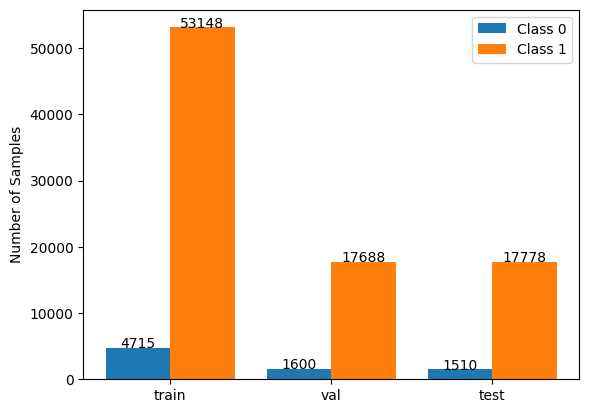

In [11]:
#Visualize

X = ['train', 'val', 'test']
zero = [4715, 1600, 1510]
one = [53148, 17688, 17778]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, zero, 0.4, label = 'Class 0')
plt.bar(X_axis + 0.2, one, 0.4, label = 'Class 1')

for i in range(len(X)):
  plt.text(i - 0.2, zero[i] + 10, zero[i], ha = 'center')
for i in range(len(X)):
  plt.text(i + 0.2, one[i] + 10, one[i], ha = 'center')
plt.xticks(X_axis, X)
plt.ylabel("Number of Samples")
plt.legend()
plt.show()

## 3.2. Danh gia phan phoi tung feature

In [ ]:
sns.displot(data=pd.DataFrame({"data": X_train.ravel(),
                               "column": np.repeat(np.arange(X_train.shape[0]), X_train.shape[1])}),
            x="data", col="column", kde=True, color='blueviolet', height=3)
plt.show()

# 4. Danh gia chung tung model ensemble

## 4.1. Chua scale data

In [10]:
#not scale

models = []
models.append(('BC', BaggingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))

In [11]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  skf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

BC: 0.922075 (0.009793)
RFC: 0.928437 (0.011853)


/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: Future

ADA: 0.889663 (0.020895)
GBC: 0.924224 (0.015328)
XGB: 0.928150 (0.011572)
[LightGBM] [Info] Number of positive: 1383, number of negative: 2332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1815
[LightGBM] [Info] Number of data points in the train set: 3715, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372275 -> initscore=-0.522471
[LightGBM] [Info] Start training from score -0.522471
[LightGBM] [Info] Number of positive: 1383, number of negative: 2332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 3715, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372275 -> initscore=-0.5224

In [14]:
print(results)

[array([0.9075436 , 0.90726735, 0.90734317, 0.90487575, 0.90672876,
       0.90193686, 0.90642749, 0.90193686, 0.91158913, 0.90321498]), array([0.90751698, 0.90529982, 0.90567474, 0.90275322, 0.90921721,
       0.90247847, 0.90187199, 0.90155962, 0.91116857, 0.90526153]), array([0.90491689, 0.90053886, 0.90167805, 0.89795292, 0.90112694,
       0.90090304, 0.89736586, 0.90239103, 0.90722326, 0.90282995]), array([0.90436102, 0.90157541, 0.9012438 , 0.89972627, 0.90183429,
       0.9017143 , 0.89855429, 0.89994882, 0.90942509, 0.90329377]), array([0.90987116, 0.9088368 , 0.90704688, 0.90337477, 0.91049447,
       0.9060924 , 0.90484153, 0.9037817 , 0.91463132, 0.90904281])]


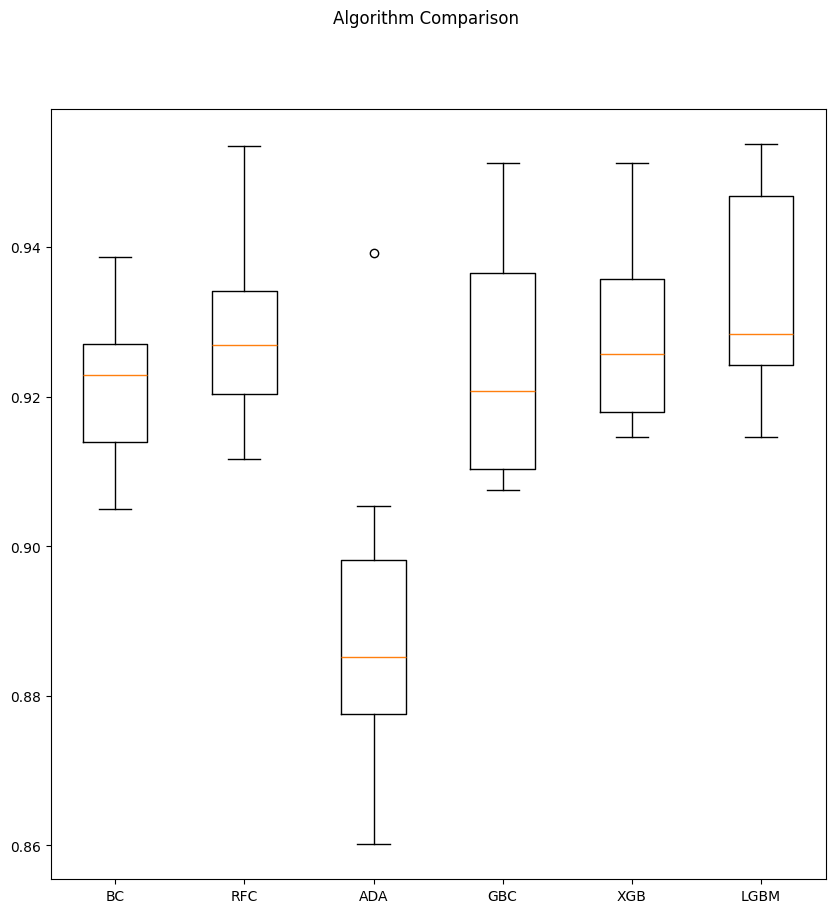

In [12]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 4.2. Sau khi scale (standard) data

In [13]:
# Standardize the dataset
scaled_models = []


scaled_models.append(('ScaledBC', Pipeline([('Scaler', StandardScaler()),('BC',BaggingClassifier())])))
scaled_models.append(('ScaledRFC', Pipeline([('Scaler', StandardScaler()),('RFC',RandomForestClassifier())])))
scaled_models.append(('ScaledADA', Pipeline([('Scaler', StandardScaler()),('ADA',AdaBoostClassifier())])))
scaled_models.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('GBC',GradientBoostingClassifier())])))
scaled_models.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB',XGBClassifier())])))

scaled_results = []
scaled_names = []
for name, model in scaled_models:
  skf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring=scoring)
  scaled_results.append(cv_results)
  scaled_names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledBC: 0.928911 (0.009728)
ScaledRFC: 0.928449 (0.010868)


/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: Future

ScaledADA: 0.889663 (0.020895)
ScaledGBC: 0.924224 (0.015328)
ScaledXGB: 0.928150 (0.011572)


In [17]:
print(scaled_results)

[array([0.90692105, 0.90330081, 0.90589391, 0.89959191, 0.90418392,
       0.90072304, 0.90462432, 0.89653935, 0.90819321, 0.90379613]), array([0.90738976, 0.90590384, 0.90750866, 0.90138355, 0.90819271,
       0.90147844, 0.903758  , 0.90093943, 0.9108154 , 0.90508378]), array([0.90491689, 0.90053886, 0.90167805, 0.89795292, 0.90112694,
       0.90090304, 0.89736586, 0.90239103, 0.90722326, 0.90282995]), array([0.90436102, 0.90157541, 0.9012438 , 0.89972627, 0.90183429,
       0.9017143 , 0.89855429, 0.89994882, 0.90942509, 0.90329377])]


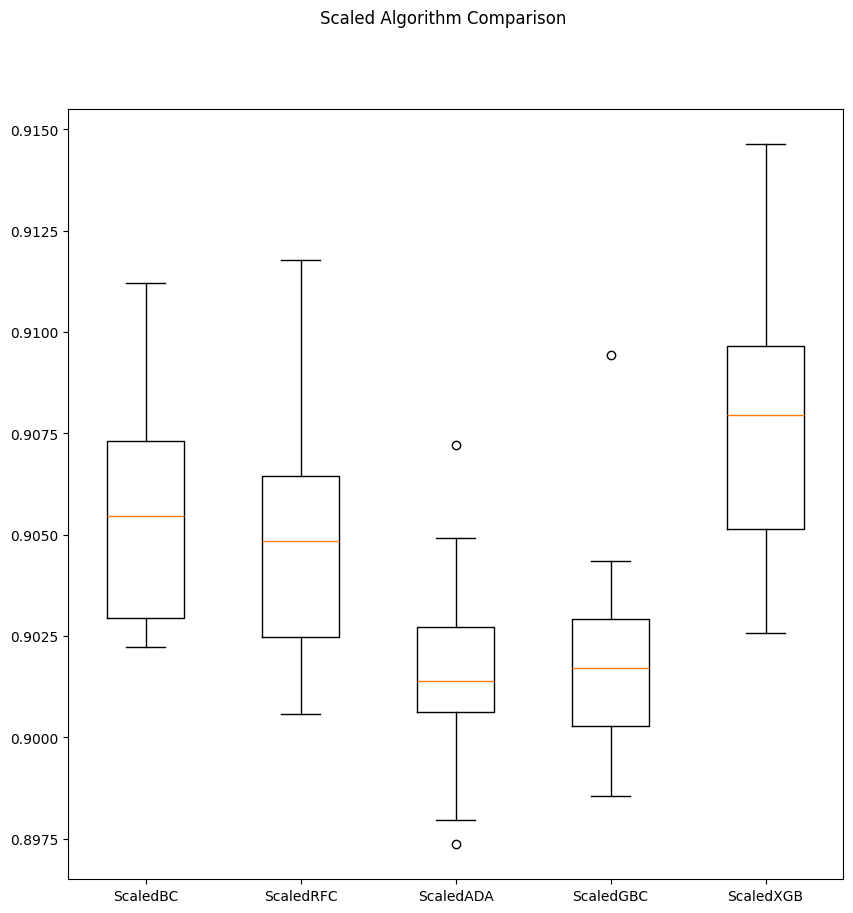

In [18]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scaled_results)
ax.set_xticklabels(scaled_names)
plt.show()

# Baseline model

In [19]:
#Baseline model: RDF

model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_val)

print(classification_report(y_val, predict))
print(f'ROC: {roc_auc_score(y_val, predict)}')

              precision    recall  f1-score   support

           0       0.74      0.18      0.29      1600
           1       0.93      0.99      0.96     17688

    accuracy                           0.93     19288
   macro avg       0.84      0.59      0.62     19288
weighted avg       0.91      0.93      0.91     19288

ROC: 0.5862357247851651


In [20]:
#Baseline model: XGB

model = XGBClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_val)

print(classification_report(y_val, predict))
print(f'ROC: {roc_auc_score(y_val, predict)}')

              precision    recall  f1-score   support

           0       0.69      0.20      0.31      1600
           1       0.93      0.99      0.96     17688

    accuracy                           0.93     19288
   macro avg       0.81      0.60      0.63     19288
weighted avg       0.91      0.93      0.91     19288

ROC: 0.595560408186341


# 5. Tinh chinh sieu tham so

In [22]:
#Baseline model: RDF
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = RandomForestClassifier(random_state=seed)
skf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=skf)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.961853 using {'n_estimators': 400}
0.961142 (0.001254) with: {'n_estimators': 50}
0.961584 (0.001098) with: {'n_estimators': 100}
0.961684 (0.000959) with: {'n_estimators': 150}
0.961687 (0.000919) with: {'n_estimators': 200}
0.961761 (0.000999) with: {'n_estimators': 250}
0.961762 (0.000994) with: {'n_estimators': 300}
0.961781 (0.001045) with: {'n_estimators': 350}
0.961853 (0.000995) with: {'n_estimators': 400}


In [23]:
#Baseline model: RDF
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = RandomForestClassifier(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)

rescaledValidationX = scaler.transform(X_val)
predict = model.predict(rescaledValidationX)
print(classification_report(y_val, predict))
print(f'ROC: {roc_auc_score(y_val, predict)}')

              precision    recall  f1-score   support

           0       0.77      0.17      0.28      1600
           1       0.93      1.00      0.96     17688

    accuracy                           0.93     19288
   macro avg       0.85      0.58      0.62     19288
weighted avg       0.92      0.93      0.91     19288

ROC: 0.5830510798281321


In [40]:
#Baseline model: XGB
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = XGBClassifier(random_state=seed)
skf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=skf)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.961930 using {'n_estimators': 50}
0.961930 (0.000791) with: {'n_estimators': 50}
0.961426 (0.001036) with: {'n_estimators': 100}
0.960932 (0.001284) with: {'n_estimators': 150}
0.960408 (0.001524) with: {'n_estimators': 200}
0.960021 (0.001431) with: {'n_estimators': 250}
0.959843 (0.001709) with: {'n_estimators': 300}
0.959729 (0.001871) with: {'n_estimators': 350}
0.959667 (0.001530) with: {'n_estimators': 400}


In [42]:
#Baseline model: XGB
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = XGBClassifier(random_state=seed, n_estimators=50)
model.fit(rescaledX, y_train)

rescaledValidationX = scaler.transform(X_val)
predict = model.predict(rescaledValidationX)
print(classification_report(y_val, predict))
print(f'ROC: {roc_auc_score(y_val, predict)}')

              precision    recall  f1-score   support

           0       0.70      0.18      0.29      1600
           1       0.93      0.99      0.96     17688

    accuracy                           0.93     19288
   macro avg       0.82      0.59      0.63     19288
weighted avg       0.91      0.93      0.91     19288

ROC: 0.5883697987336046


# 6. Under Sampling

In [24]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 4715, 53148]))

In [25]:
def undersample(X_train, y_train, ratio, random_state=seed):
    np.random.seed(random_state)

    idx_class_0 = np.where(y_train == 0)[0]
    idx_class_1 = np.where(y_train == 1)[0]


    num_samples_class_0 = len(idx_class_0)
    num_samples_class_1 = min(int(num_samples_class_0 / ratio[0] * ratio[1]), len(idx_class_1))


    undersampled_idx_class_1 = np.random.choice(idx_class_1, size=num_samples_class_1)
    undersampled_indices = np.concatenate([undersampled_idx_class_1, idx_class_0])
    

    X_train_balanced = X_train[undersampled_indices]
    y_train_balanced = y_train[undersampled_indices]
    
    return X_train_balanced, y_train_balanced

In [26]:
X_train_40_60, y_train_40_60 = undersample(X_train, y_train, ratio={0: 0.4, 1: 0.6}, random_state=seed)
X_train_30_70, y_train_30_70 = undersample(X_train, y_train, ratio={0: 0.3, 1: 0.7}, random_state=seed)
X_train_20_80, y_train_20_80 = undersample(X_train, y_train, ratio={0: 0.2, 1: 0.8}, random_state=seed)

In [27]:
print(np.unique(y_train_20_80, return_counts=True))
print(np.unique(y_train_30_70, return_counts=True))
print(np.unique(y_train_40_60, return_counts=True))

(array([0, 1]), array([ 4715, 18860]))
(array([0, 1]), array([ 4715, 11001]))
(array([0, 1]), array([4715, 7072]))


In [44]:
#Baseline model: RDF
from sklearn.metrics import fbeta_score

X_train_undersampling = [X_train_30_70, X_train_20_80]
y_train_undersampling = [y_train_30_70, y_train_20_80]

for X, y in zip(X_train_undersampling, y_train_undersampling):
    model = RandomForestClassifier()
    model.fit(X, y)
    predict = model.predict(X_val)
    print(classification_report(y_val, predict))
    # print(f"balanced accuracy: {balanced_accuracy_score(y_val, predict)}")
    print(f'ROC: {roc_auc_score(y_val, predict)}')
    print(f'f_0.5: {fbeta_score(y_val, predict, average="macro", beta=0.5)}')
    print(f'f_2: {fbeta_score(y_val, predict, average="macro", beta=2)}')


              precision    recall  f1-score   support

           0       0.33      0.54      0.41      1600
           1       0.96      0.90      0.93     17688

    accuracy                           0.87     19288
   macro avg       0.65      0.72      0.67     19288
weighted avg       0.90      0.87      0.89     19288

ROC: 0.7206398405698777
f_0.5: 0.6533303335251718
f_2: 0.6964655898563018
              precision    recall  f1-score   support

           0       0.45      0.39      0.42      1600
           1       0.95      0.96      0.95     17688

    accuracy                           0.91     19288
   macro avg       0.70      0.67      0.68     19288
weighted avg       0.90      0.91      0.91     19288

ROC: 0.6728082598371777
f_0.5: 0.6904514746326365
f_2: 0.6767821392139935


In [45]:
#Baseline model: XGB
X_train_undersampling = [X_train_30_70, X_train_20_80]
y_train_undersampling = [y_train_30_70, y_train_20_80]

for X, y in zip(X_train_undersampling, y_train_undersampling):
    model = XGBClassifier()
    model.fit(X, y)
    predict = model.predict(X_val)
    print(classification_report(y_val, predict))
    # print(f"balanced accuracy: {balanced_accuracy_score(y_val, predict)}")
    print(f'ROC: {roc_auc_score(y_val, predict)}')
    print(f'f_0.5: {fbeta_score(y_val, predict, average="macro", beta=0.5)}')
    print(f'f_2: {fbeta_score(y_val, predict, average="macro", beta=2)}')

              precision    recall  f1-score   support

           0       0.32      0.57      0.41      1600
           1       0.96      0.89      0.92     17688

    accuracy                           0.86     19288
   macro avg       0.64      0.73      0.67     19288
weighted avg       0.91      0.86      0.88     19288

ROC: 0.7301024706015378
f_0.5: 0.6475493317059955
f_2: 0.6981885589586577
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1600
           1       0.95      0.95      0.95     17688

    accuracy                           0.90     19288
   macro avg       0.68      0.68      0.68     19288
weighted avg       0.90      0.90      0.90     19288

ROC: 0.6776902419719584
f_0.5: 0.6778520108386245
f_2: 0.6777306450942805


# 7. Phat mo hinh (penalize)

In [48]:
model_pen = XGBClassifier(class_weight='balanced')
model_pen.fit(X_train_20_80, y_train_20_80)
predict = model_pen.predict(X_val)

print(classification_report(y_val, predict))
print(f'ROC: {roc_auc_score(y_val, predict)}')

/Users/TrangNgan/HUST/DATN/OntimePrediction/retrain_env/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:10:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1600
           1       0.95      0.95      0.95     17688

    accuracy                           0.90     19288
   macro avg       0.68      0.68      0.68     19288
weighted avg       0.90      0.90      0.90     19288

ROC: 0.6776902419719584


# 8. Over Sampling

## 8.1. Naive random over-sampling

In [49]:
X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train_20_80, y_train_20_80)
clf_random = XGBClassifier().fit(X_resampled, y_resampled)
predict = clf_random.predict(X_val)

print(classification_report(y_val, predict))
print(f'ROC: {roc_auc_score(y_val, predict)}')

              precision    recall  f1-score   support

           0       0.25      0.66      0.37      1600
           1       0.96      0.82      0.89     17688

    accuracy                           0.81     19288
   macro avg       0.61      0.74      0.63     19288
weighted avg       0.91      0.81      0.85     19288

ROC: 0.7418878618272275


## 8.2 (i) the Synthetic Minority Oversampling Technique (SMOTE)

In [50]:
X_resampled, y_resampled = SMOTE(random_state=seed).fit_resample(X_train_20_80, y_train_20_80)

clf_smote = RandomForestClassifier().fit(X_resampled, y_resampled)
predict = clf_smote.predict(X_val)

print(classification_report(y_val, predict))
print(f'ROC: {roc_auc_score(y_val, predict)}')

              precision    recall  f1-score   support

           0       0.36      0.48      0.41      1600
           1       0.95      0.92      0.94     17688

    accuracy                           0.89     19288
   macro avg       0.66      0.70      0.68     19288
weighted avg       0.90      0.89      0.89     19288

ROC: 0.7004158186341022


## 8.3. (ii) the Adaptive Synthetic (ADASYN)

In [51]:
X_resampled, y_resampled = ADASYN(random_state=seed).fit_resample(X_train_20_80, y_train_20_80)

clf_adasyn = RandomForestClassifier().fit(X_resampled, y_resampled)
predict = clf_adasyn.predict(X_val)

print(classification_report(y_val, predict))
print(f'ROC: {roc_auc_score(y_val, predict)}')

              precision    recall  f1-score   support

           0       0.36      0.46      0.41      1600
           1       0.95      0.93      0.94     17688

    accuracy                           0.89     19288
   macro avg       0.66      0.69      0.67     19288
weighted avg       0.90      0.89      0.89     19288

ROC: 0.6947013511985527
